# Multivariant Linear Regression

The data we will be using is a ex1data2.txt file which contains a list of bedroom sizes, number of bedrooms and their corresponding price of the house.

The values on the first column contains the bedroom sizes, the values of the second column contains the number of bedrooms and values on the third column contains the corresponding price of the house in Naira.

Objective: To build a multivariate linear regression model and the optimization technique to generate a model that will predict reasonable estimate of a house price when it is supplied the customers desired room size and number of rooms.

In [51]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [52]:
#loading dataset
column_names = ["size","bedroom","price"]
data = pd.read_csv('data/ex1data2.txt', names = column_names)

In [53]:
#a little exploration
data.sample(5)

,size,bedroom,price
1,1600,3,329900
38,4215,4,549000
17,1236,3,199900
37,2132,4,345000
24,3890,3,573900


In [54]:
print('data shape: {}, row size: {}, column size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (47, 3), row size: 47, column size: 3


In [55]:
data.describe()

,size,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [56]:
#checking for empty cells
data.isnull().any()

size       False
bedroom    False
price      False
dtype: bool

In [57]:
# Correlation 
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,size,bedroom,price
size,1,0.559967,0.854988
bedroom,0.559967,1,0.442261
price,0.854988,0.442261,1


the result shows positive correlation among between the variables ranging from a medium 0.44 (price vs bedroom) to high 0.85 (size vs price)

In [58]:
#lets divide the data into “attributes” and “labels”. X variable contains all the attributes/features of the house (independent) and y variable contains labels (price/dependent variable)

X = data[['size', 'bedroom']].values
y = data[['price']].values

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


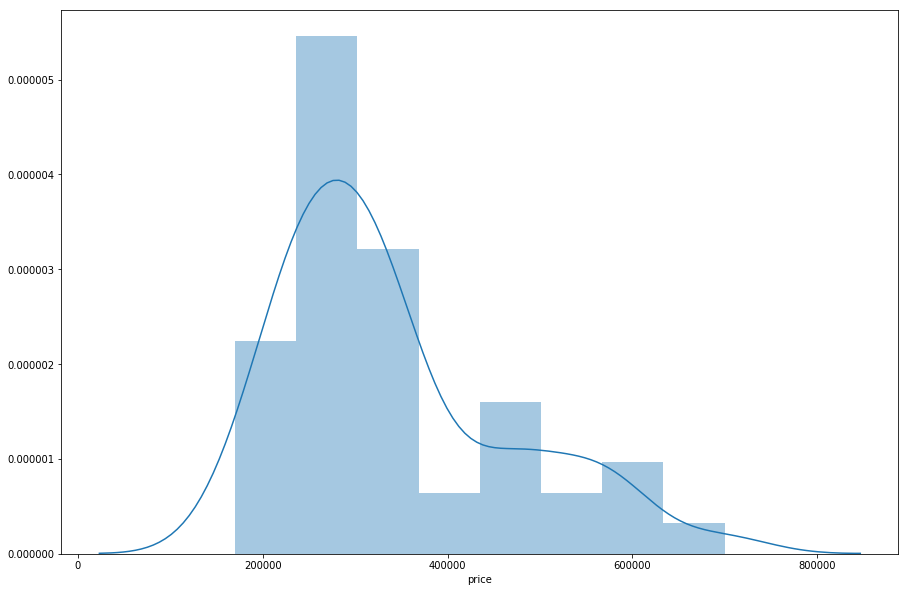

In [59]:
#a quick check on the average price of the houses
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['price'])

As observed, most of the houses are between 200000 to 399999

In [60]:
# Some splitting (80% of the data to the training set while 20% of the data to test set)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
# training the model

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 [90561.37024101]
Coefficients: 
 [[  125.85346026 -1596.9314267 ]]


In [67]:
New_size = 4030
New_bedroom = 3
print ('price: \n', regressor.predict([[New_size ,New_bedroom]]))


price: 
 [[592960.02081529]]


In [73]:
#A lil play with statsmodel. Could be discussed in class I guess

import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.43e-13
Time:                        21:11:31   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.96e+04   4.18e+04      2.145      0.0